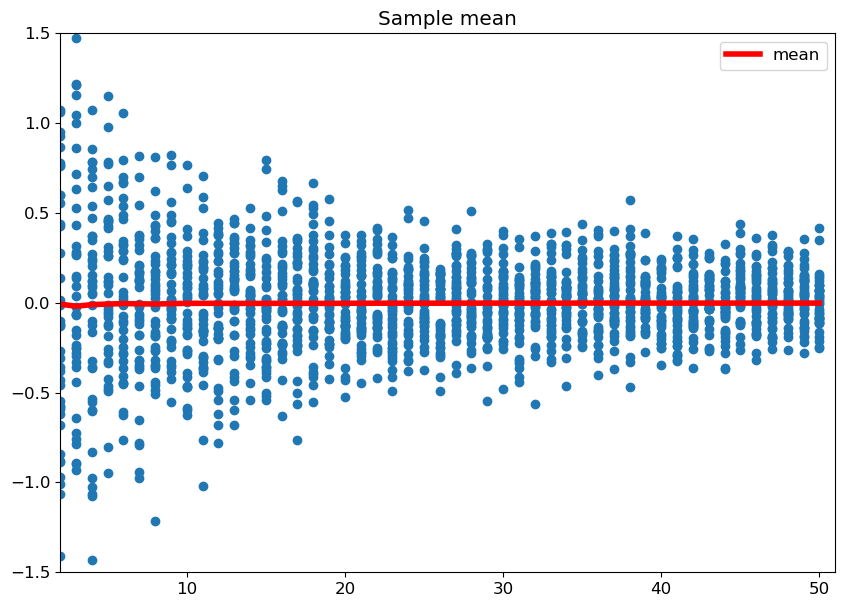

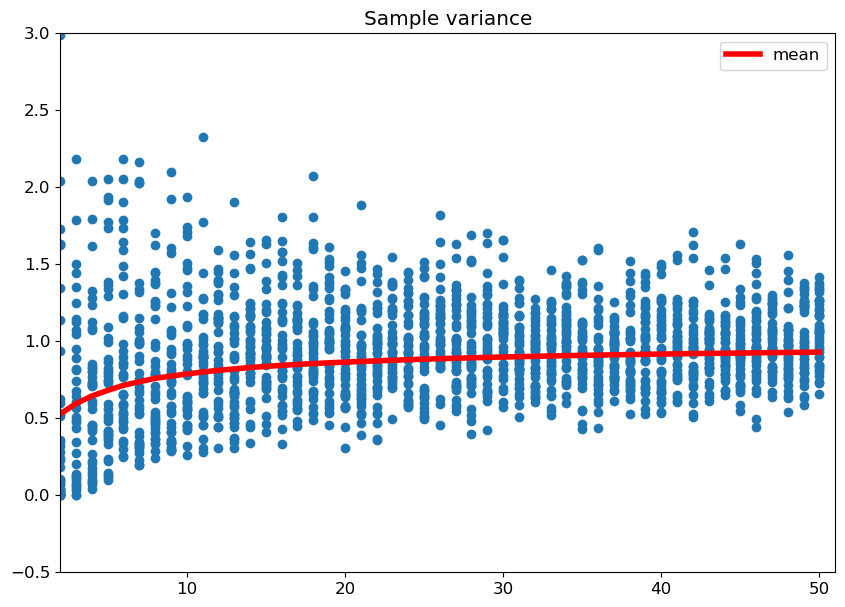

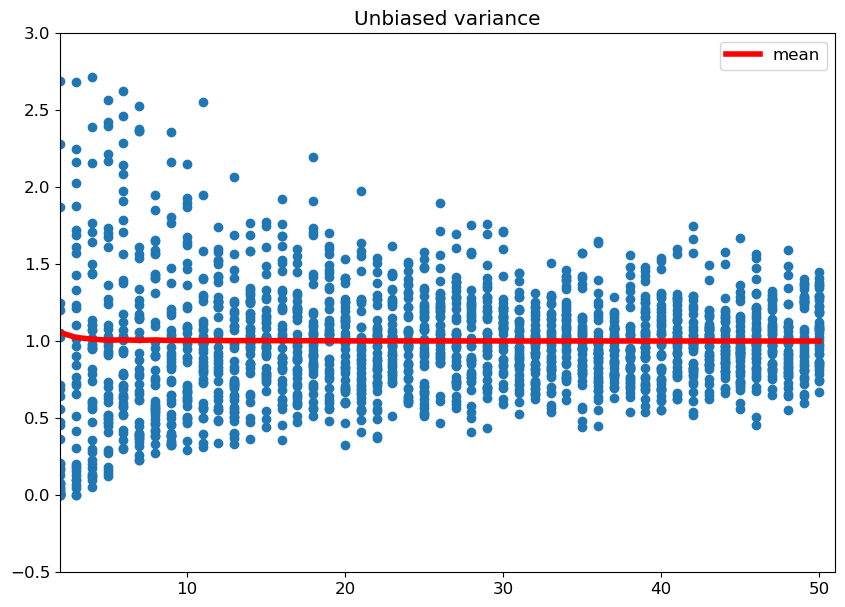

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal
import matplotlib
matplotlib.rcParams['font.size']=12

# 2000回繰り返した際の個々のデータ
raw_linex = [] # データ数
raw_mu = []    # 標本平均
raw_s2 = []    # 標本分散
raw_u2 = []    # 不偏分散

# 2000回全体の平均値
mean_linex = [] # データ数
mean_mu = []    # 標本平均
mean_s2 = []    # 標本分散
mean_u2 = []    # 不偏分散

for n in np.arange(2,51): # 観測データ数Nを変化させて実行
    for c in range(2000): # 特定のNについて2000回の推定を繰り返す
        ds = normal(loc=0, scale=1, size=n)
        raw_mu.append(np.mean(ds))         # 標本平均
        raw_s2.append(np.var(ds))          # 標本分散
        raw_u2.append(np.var(ds)*n/(n-1))  # 不偏分散
        raw_linex.append(n)
    mean_mu.append(np.mean(raw_mu)) # 標本平均の平均
    mean_s2.append(np.mean(raw_s2)) # 標本分散の平均
    mean_u2.append(np.mean(raw_u2)) # 不偏分散の平均
    mean_linex.append(n)

# プロットデータを40個に間引きする
raw_linex = raw_linex[0:-1:50]
raw_mu = raw_mu[0:-1:50]
raw_s2 = raw_s2[0:-1:50]
raw_u2 = raw_u2[0:-1:50]

def draw_subplot(subplot, linex1, liney1, linex2, liney2):
    subplot.set_xlim(min(linex1),max(linex1)+1)
    subplot.scatter(linex1, liney1)
    subplot.plot(linex2, liney2, color='red', linewidth=4, label="mean")
    subplot.legend(loc=0)

fig = plt.figure(figsize=(10,7))
subplot = fig.add_subplot(1,1,1)
subplot.set_title('Sample mean')
subplot.set_ylim(-1.5,1.5)
draw_subplot(subplot, raw_linex, raw_mu, mean_linex, mean_mu)

fig = plt.figure(figsize=(10,7))
subplot = fig.add_subplot(1,1,1)
subplot.set_title('Sample variance')
subplot.set_ylim(-0.5,3.0)
draw_subplot(subplot, raw_linex, raw_s2, mean_linex, mean_s2)

fig = plt.figure(figsize=(10,7))
subplot = fig.add_subplot(1,1,1)
subplot.set_title('Unbiased variance')
subplot.set_ylim(-0.5,3.0)
draw_subplot(subplot, raw_linex, raw_u2, mean_linex, mean_u2)

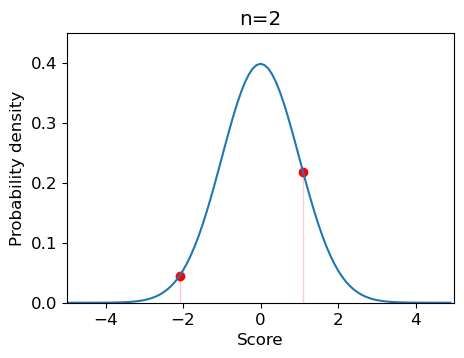

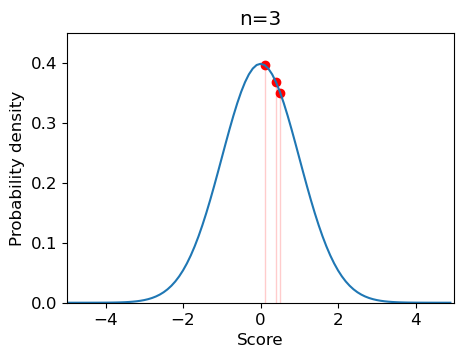

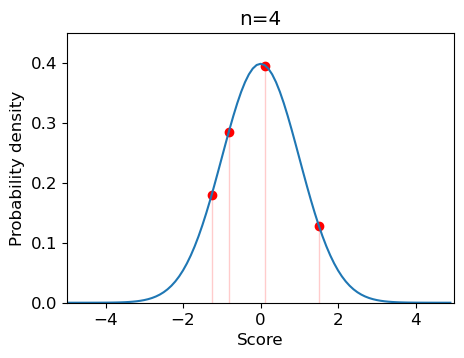

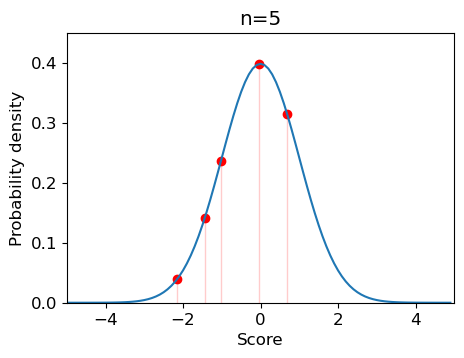

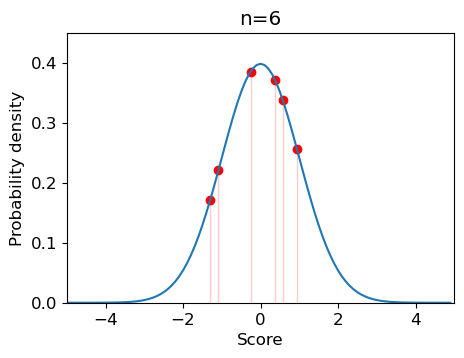

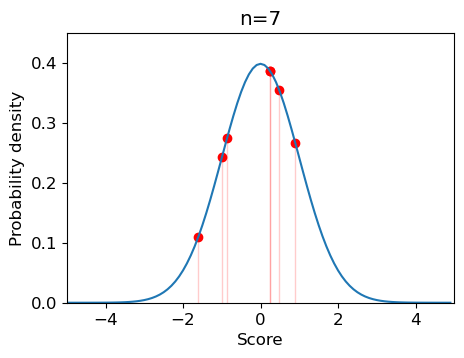

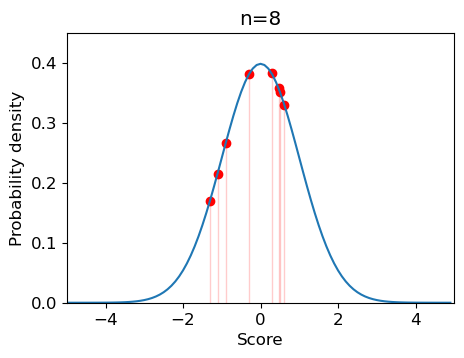

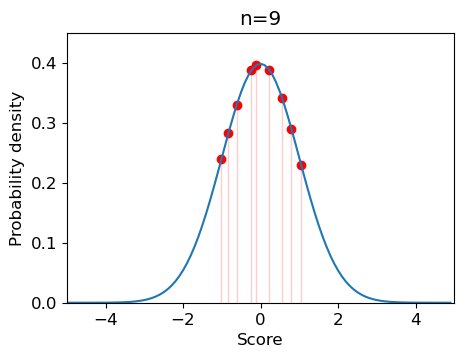

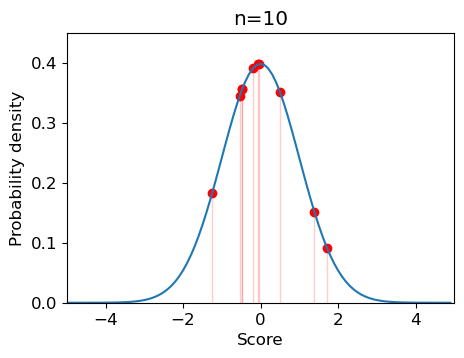

In [27]:
from scipy.stats import norm
x=np.arange(-5,5,0.1)
y=norm.pdf(x,0,1) # 標準正規分布

for i in range(2,11):
    fig = plt.figure(figsize=(5,3.5))
    subplot = fig.add_subplot(1,1,1)
    subplot.set_title('n={}'.format(i))
    subplot.set_ylabel('Probability density')
    subplot.set_xlabel('Score')
    subplot.set_ylim(0,0.45)
    subplot.set_xlim(-5,5,0.1)
    a=np.random.normal(loc=0, scale=1, size = i)
    for t in a:
        subplot.vlines(t, 0, norm.pdf(t,0,1), colors='red', lw=1, alpha=0.2)
        subplot.plot(t, norm.pdf(t,0,1), "or-")
    subplot.plot(x,y)